In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

In [6]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [8]:
import seaborn as sns

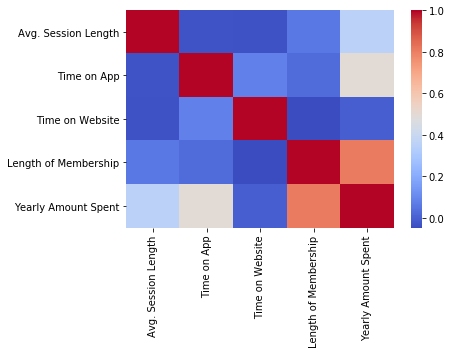

In [9]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [10]:
df.drop(['Time on Website'],axis=1,inplace=True)

In [11]:
df.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


In [12]:
X=df.drop('Yearly Amount Spent',axis=1)

In [13]:
X.head()

,Avg. Session Length,Time on App,Length of Membership
0,34.497268,12.655651,4.082621
1,31.926272,11.109461,2.664034
2,33.000915,11.330278,4.104543
3,34.305557,13.717514,3.120179
4,33.330673,12.795189,4.446308


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss=StandardScaler()

In [16]:
scaled_array=ss.fit_transform(X)

In [17]:
scaled_array.shape

(500, 3)

In [18]:
X=pd.DataFrame(data=scaled_array,columns=X.columns)

In [19]:
X.head()

,Avg. Session Length,Time on App,Length of Membership
0,1.456351,0.607280,0.550107
1,-1.136502,-0.949464,-0.870927
2,-0.052723,-0.727139,0.572067
3,1.263010,1.676390,-0.413996
4,0.279838,0.747770,0.914422


In [22]:
Y=df['Yearly Amount Spent']

In [23]:
Y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [33]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
ypred=model.predict(X_test)

In [36]:
ypred.shape

(150,)

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


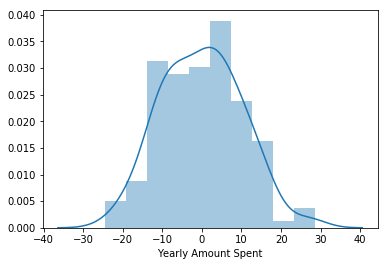

In [38]:
sns.distplot(ypred-Y_test)

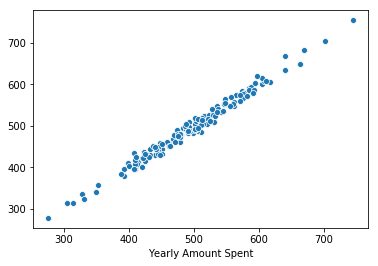

In [39]:
sns.scatterplot(Y_test,ypred)

In [40]:
from sklearn.metrics import mean_absolute_error

In [42]:
mean_absolute_error(Y_test,ypred)

8.311801668711217